<a href="https://colab.research.google.com/github/nurfnick/SMaRT2023/blob/main/Code/SIRBasicModelWithMutations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

In [43]:
def SIR(y,t, alpha, beta):
  S,I,R = y
  dydt = [-alpha*S*I,alpha*S*I - beta*I,beta*I]
  return dydt

In [44]:
alpha = 3
beta = 1

In [45]:
y0 = [.999,.001,0]

In [46]:
t = np.arange(0, 20, .01)

In [47]:
np.size(t)

2000

In [48]:


sol = odeint(SIR, y0, t, args=(alpha, beta))

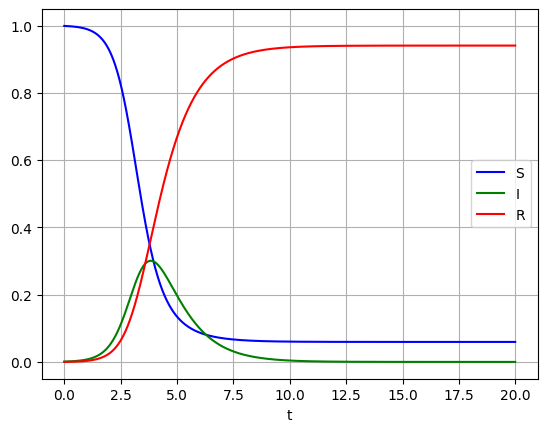

In [49]:
plt.plot(t, sol[:, 0], 'b', label='S')

plt.plot(t, sol[:, 1], 'g', label='I')

plt.plot(t, sol[:, 2], 'r', label='R')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()

# Attempt to Add New effects of Mutation

In [50]:
pointOfMutation = 0.5 #this will ask that 50% have recovered from the virus

t0 = t[np.argwhere(sol[:,2]>pointOfMutation)[0][0]]

In [51]:
t1 = np.arange(t0, 20, 0.01)

In [52]:
sol1 = odeint(SIR, y0, t1, args=(alpha, beta))

In [53]:
S1 = np.append(np.ones(int(t0*100)),sol1[:,0])
I1 = np.append(np.zeros(int(t0*100)),sol1[:,1])
R1 = np.append(np.zeros(int(t0*100)),sol1[:,2])

In [54]:

t1plot = np.append(np.zeros(int(t0*10)),t1, axis = 0)

t1plot

array([ 0.  ,  0.  ,  0.  , ..., 19.97, 19.98, 19.99])

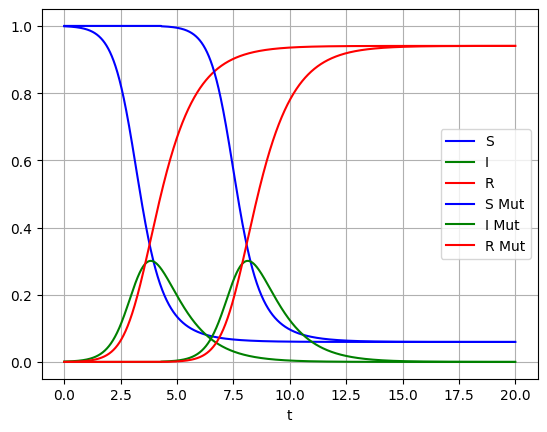

In [55]:
plt.plot(t, sol[:, 0], 'b', label='S')

plt.plot(t, sol[:, 1], 'g', label='I')

plt.plot(t, sol[:, 2], 'r', label='R')

plt.plot(t, S1, 'b', label='S Mut')

plt.plot(t, I1, 'g', label='I Mut')

plt.plot(t, R1, 'r', label='R Mut')

plt.legend(loc='best')

plt.xlabel('t')

plt.grid()

plt.show()